## Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# Style Text
bold = '\033[1m'
normal = '\033[0m'

## Data Loading

In [2]:
df = pd.read_csv("Data/winequality_red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Menghitung nilai unique pada data
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [5]:
#Mengecek missing value
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Exploration

In [6]:
# Cek Data quality
df_quality = pd.DataFrame(
    {
        "quality":df["quality"].unique(),
    }
)

df_quality

,quality
0,5
1,6
2,7
3,4
4,8
5,3


In [7]:
df.loc[df['quality'] < 7, "quality"] = 0 
df.loc[df['quality'] >= 7, "quality"] = 1

In [8]:
df_visquality = df['quality'].value_counts()
df_visquality

0    1382
1     217
Name: quality, dtype: int64

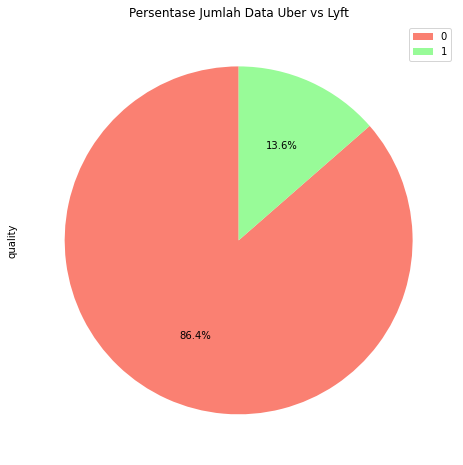

In [9]:
pie_color=['salmon','palegreen']
df_visquality.plot(kind="pie", figsize=(14,8), startangle=90, autopct="%1.1f%%", labels=None, colors=pie_color)
plt.title('Persentase Jumlah Data Uber vs Lyft')
plt.legend(labels=df_visquality.index)

plt.show()

## Data Preprocessing

In [10]:
X = df.drop("quality", axis=1)
Y = df["quality"]

print(X.shape)
print(Y.shape)

(1599, 11)
(1599,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=120)

## Model Define

### Logistic Regression

#### Model

In [12]:
lr = LogisticRegression()
lr

LogisticRegression()

#### Training Result

In [13]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8827208756841283

#### Testing Result

In [14]:
lr_pred = lr.predict(X_test)
print("Result Logistic Regression :", round(accuracy_score(y_test, lr_pred),4) * 100,"%")

Result Logistic Regression : 86.25 %


#### Logistic Regression Model Conclusion

##### Num

In [15]:
#Ringkasan Evaluasi Model Logistic Regression
print("=============================================================")
print(bold,'Logistic Regression Model Conclusion',normal)
print("=============================================================")
print('Logistic Regression Model Accuracy: ', accuracy_score(y_test, lr_pred))
print('Logistic Regression Model f1 score: ', metrics.f1_score(y_test, lr_pred))
print('Logistic Regression Model MAE: ', metrics.mean_absolute_error(y_test, lr_pred))
print('Logistic Regression Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print("=============================================================")

 Logistic Regression Model Conclusion 
Logistic Regression Model Accuracy:  0.8625
Logistic Regression Model f1 score:  0.3529411764705882
Logistic Regression Model MAE:  0.1375
Logistic Regression Model RMSE:  0.37080992435478316


##### Vis

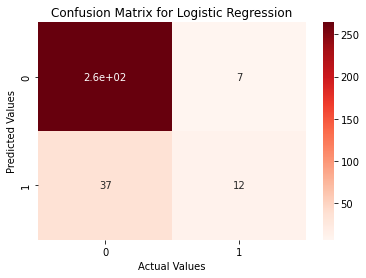

In [16]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='Reds')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Support Vector Machine

#### Model

In [17]:
clf = svm.SVC(kernel='linear')
clf

SVC(kernel='linear')

#### Training Result

In [18]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8686473807662236

#### Testing Result

In [19]:
clf_pred = clf.predict(X_test)
print("Result Support Vector Machine :", round(accuracy_score(y_test, clf_pred),4) * 100,"%")

Result Support Vector Machine : 84.69 %


#### Support Vector Machine Model Conclusion

##### Num

In [20]:
#Ringkasan Evaluasi Model Support Vector Machine
print("=============================================================")
print(bold,'Support Vector Machine Model Conclusion',normal)
print("=============================================================")
print('Support Vector Machine Model Accuracy: ', accuracy_score(y_test, clf_pred))
print('Support Vector Machine Model f1 score: ', metrics.f1_score(y_test, clf_pred))
print('Support Vector Machine Model MAE: ', metrics.mean_absolute_error(y_test, clf_pred))
print('Support Vector Machine Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))
print("=============================================================")

 Support Vector Machine Model Conclusion 
Support Vector Machine Model Accuracy:  0.846875
Support Vector Machine Model f1 score:  0.0
Support Vector Machine Model MAE:  0.153125
Support Vector Machine Model RMSE:  0.3913118960624632


##### Vis

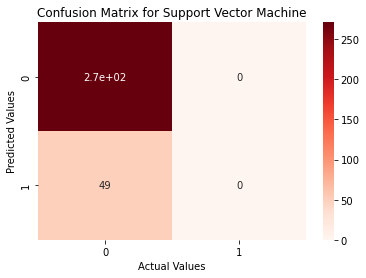

In [21]:
sns.heatmap(confusion_matrix(y_test, clf_pred), annot=True, cmap='Reds')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

### KNN

#### Model

In [22]:
knn = KNeighborsClassifier(n_neighbors=16)
knn

KNeighborsClassifier(n_neighbors=16)

#### Training Result

In [23]:
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.872556684910086

#### Testing Result

In [24]:
knn_pred = knn.predict(X_test)
print("Result KNN :", round(accuracy_score(y_test, knn_pred),4) * 100,"%")

Result KNN : 85.31 %


#### KNN Model Conclusion

##### Num

In [25]:
#Ringkasan Evaluasi Model Support Vector Machine
print("=============================================================")
print(bold,'KNN Model Conclusion',normal)
print("=============================================================")
print('KNN Model Accuracy: ', accuracy_score(y_test, knn_pred))
print('KNN Model f1 score: ', metrics.f1_score(y_test, knn_pred))
print('KNN Model MAE: ', metrics.mean_absolute_error(y_test, knn_pred))
print('KNN Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))
print("=============================================================")

 KNN Model Conclusion 
KNN Model Accuracy:  0.853125
KNN Model f1 score:  0.07843137254901959
KNN Model MAE:  0.146875
KNN Model RMSE:  0.3832427429188973


##### Vis

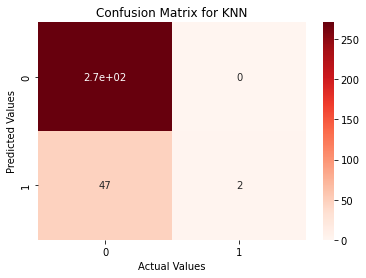

In [26]:
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='Reds')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for KNN')
plt.show()

### Decision Tree

#### Model

In [27]:
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

#### Training Result

In [28]:
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train)

1.0

#### Testing Result

In [29]:
dt_pred = dtree.predict(X_test)
print("Result Decision Tree :", round(accuracy_score(y_test, dt_pred),4) * 100,"%")

Result Decision Tree : 84.69 %


#### Decision Tree Model Conclusion

##### Num

In [30]:
#Ringkasan Evaluasi Model Support Vector Machine
print("=============================================================")
print(bold,'Decision Tree Model Conclusion',normal)
print("=============================================================")
print('Decision Tree Model Accuracy: ', accuracy_score(y_test, dt_pred))
print('Decision Tree Model f1 score: ', metrics.f1_score(y_test, dt_pred))
print('Decision Tree Model MAE: ', metrics.mean_absolute_error(y_test, dt_pred))
print('Decision Tree Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))
print("=============================================================")

 Decision Tree Model Conclusion 
Decision Tree Model Accuracy:  0.846875
Decision Tree Model f1 score:  0.4842105263157895
Decision Tree Model MAE:  0.153125
Decision Tree Model RMSE:  0.3913118960624632


##### Vis

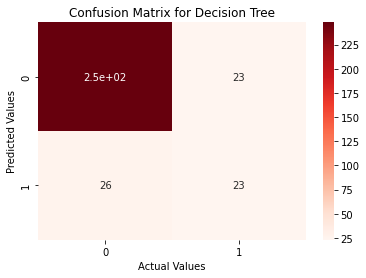

In [31]:
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, cmap='Reds')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

## Conclusion

In [32]:
print("Based on the results of Red Wine Quality data testing, it was found that the best training accuracy was in the Decision Tree model of", round(dtree.score(X_train, y_train)) * 100,"% while the best testing accuracy was in the Logistic Regression model of",round(accuracy_score(y_test, lr_pred),4) * 100,"%.")

Based on the results of Red Wine Quality data testing, it was found that the best training accuracy was in the Decision Tree model of 100 % while the best testing accuracy was in the Logistic Regression model of 86.25 %.
